# 住宅価格の予想
住宅価格の回帰

Week3で使用したアイオワ州エイムズ市の住宅価格データセットを使い、回帰問題を解く練習をします。


79種類の特徴量（説明変数）を活用し、住宅価格の数値を推測する問題が設定できます。こういった連続値のものを推測する問題を回帰問題と呼びます。


House Prices: Advanced Regression Techniques


今回使う手法の一覧
scikit-laernを使い以下の手法で学習と推定を行っていきます。それぞれの手法についての詳細は今の段階では扱いません。ライブラリを使えばどれも気軽に利用できることや、手法毎の結果に違いがあることを簡単に見ていきます。


線形回帰  
SVM  
決定木  
ランダムフォレスト

分類問題と回帰問題の両方で使える手法と、そうではない手法が存在します。


3.データセットの準備

Week3同様にKaggleからデータセットをダウンロードしてください。train.csvのみを使用します。


House Prices: Advanced Regression Techniques | Kaggle


4.回帰問題の流れ

回帰問題の流れは分類問題と基本的には同じですから、課題1のように細かい説明は行いません。


練習のための準備
このデータセットには79種類の特徴量（目的変数）がありますが、Week3で探索して分かったようにさまざまなタイプのデータが含まれています。これをどう前処理するかということは機械学習において重要な箇所ですが、今回は回帰問題の学習や評価の練習を優先するため、説明変数(特徴量)GrLivAreaとYearBuiltの2つだけを利用することにします。


## 【問題1】練習のために特徴量の選択
データセットを読み込んだ後、説明変数GrLivAreaとYearBuilt、目的変数SalePriceをそれぞれ抜き出してください。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

df = pd.read_csv("train.csv")
#np.set_printoptions(suppress=True)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
display(df)

# GrLivArea：地上（地上）のリビングエリアの平方フィート
# YearBuilt：元の建設日
# SalePrice: プロパティのドルでの販売価格。これは、予測しようとしているターゲット変数です。

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [2]:
X = df.loc[:,["GrLivArea","YearBuilt"]]
y = df.loc[:, ["SalePrice"]]

#X = pd.DataFrame(df,columns=["GrLivArea","YearBuilt"])
#y = pd.DataFrame(df, columns=["SalePrice"])
display(X)
display(y)

,GrLivArea,YearBuilt
0,1710,2003
1,1262,1976
2,1786,2001
3,1717,1915
4,2198,2000
...,...,...
1455,1647,1999
1456,2073,1978
1457,2340,1941
1458,1078,1950


,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [3]:
#欠損値確認
X.info()
y.info()
print(X.isnull().sum())
print(y.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   GrLivArea  1460 non-null   int64
 1   YearBuilt  1460 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   SalePrice  1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB
GrLivArea    0
YearBuilt    0
dtype: int64
SalePrice    0
dtype: int64



## 【問題2】線形回帰による推定と評価
データを簡単に分析、前処理し、 線形回帰 による学習、推定、評価、可視化までの一連の流れを作成・実行してください。


sklearn.linear_model.LinearRegression — scikit-learn 0.21.3 documentation


評価のための指標値は回帰問題では 平均二乗誤差（Mean Squared Error, MSE） を使うことが一般的です。


sklearn.metrics.mean_squared_error — scikit-learn 0.21.3 documentation


可視化は横軸にある特徴量、縦軸に推測した住宅価格といった方法で行えます。
scatterを用いて、実際のデータと予測結果を比較できるグラフを作りましょう。

### 分析

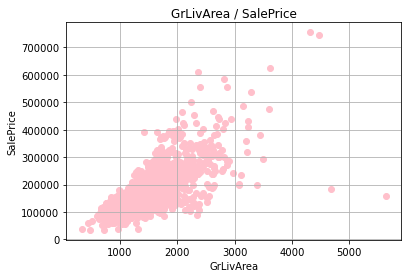

In [4]:
plt.scatter(X["GrLivArea"], y, color="pink")
plt.title("GrLivArea / SalePrice")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.grid()

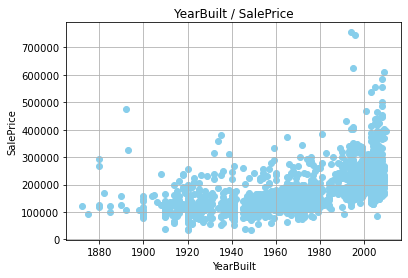

In [5]:
plt.scatter(X["YearBuilt"], y, color="skyblue")
plt.title("YearBuilt / SalePrice")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.grid()

### 前処理

In [6]:
#欠損値無し、標準化無し
#ndarray型変換
nd_X = X.values
nd_y = y.values
print(type(nd_X))
print(type(nd_y))
print(nd_X)
print(nd_y)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[[1710 2003]
 [1262 1976]
 [1786 2001]
 ...
 [2340 1941]
 [1078 1950]
 [1256 1965]]
[[208500]
 [181500]
 [223500]
 ...
 [266500]
 [142125]
 [147500]]


### 線形回帰

In [7]:
#訓練、検証の分割
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(nd_X, nd_y, test_size=0.25, random_state=0)

#各データ
GrLivArea_train = X_train[:,[0]]
GrLivArea_test = X_test[:,[0]]
YearBuilt_train = X_train[:,[1]]
YearBuilt_test = X_test[:,[1]]

#モデルをインスタンス化して、モデルの中にあるメソッドを使える状態にする
#scaler = StandardScaler()

# 標準化をする（訓練用データで.fitを行う）今回は使わない
#scaler.fit(X_train)

# 標準化をする（訓練用、検証用双方で.transformを行う）
#X_train_std = scaler.transform(X_train)
#X_test_std = scaler.transform(X_test)

#fit_transform:パラメータ計算とデータ変換をまとめて実行
#X_train_std = scaler.fit_transform(X_train)
#X_test_std = scaler.fit_transform(X_test)

#X_train_std

In [8]:
#線形回帰
from sklearn.linear_model import LinearRegression
#モデルの学習、学習用データＸ，ｙをもとにモデルの学習を行う
LR = LinearRegression().fit(X_train, y_train)
# 検証用のデータxからｙの値を予測する
y_predict_LR = LR.predict(X_test)
y_predict_LR

array([[264130.40861155],
       [155093.63716252],
       [127493.47870881],
       [236349.8094044 ],
       [138415.02247492],
       [ 68001.4401539 ],
       [212572.79449248],
       [130915.3471754 ],
       [498069.48870688],
       [173760.0569042 ],
       [200489.65236043],
       [201591.22211132],
       [255410.93962238],
       [115321.21029985],
       [113481.85032117],
       [145725.14931418],
       [242207.30250925],
       [152306.23872418],
       [146617.18064977],
       [152472.84046326],
       [147519.02950873],
       [148718.47833507],
       [102874.99846127],
       [200713.38469837],
       [218832.27248909],
       [109832.22802565],
       [216030.6801281 ],
       [ 91825.7681413 ],
       [235642.59522153],
       [125651.57562222],
       [192314.4036478 ],
       [228657.33272014],
       [127957.32550698],
       [277648.7376309 ],
       [270992.71586664],
       [199345.14593332],
       [220053.54456181],
       [118752.54138154],
       [2705

In [9]:
#回帰の評価は平均二乗誤差で行う、アヤメの分類などは正解率など使う
from sklearn.metrics import mean_squared_error
#y_true配列のような形状:グラウンドトゥルース（正しい）ターゲット値。
#y_pred配列のような形状:推定目標値。

mse = mean_squared_error(y_test, y_predict_LR)
print(mse)
rmse = np.sqrt(mse)
print(rmse)

2725908099.063638
52210.22983155349


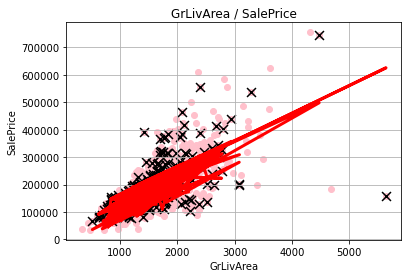

In [10]:
plt.scatter(X["GrLivArea"], y, color="pink")
plt.scatter(X_test[:,[0]],y_test , marker="x", color="black", s=80)
plt.plot(X_test[:,[0]], y_predict_LR, color="r", linewidth=3 )
plt.title("GrLivArea / SalePrice")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.grid()


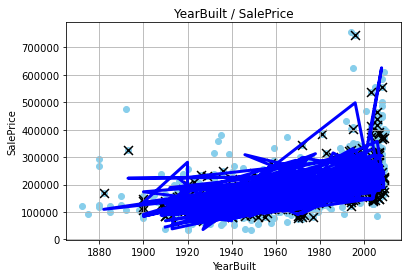

In [11]:
plt.scatter(X["YearBuilt"], y, color="skyblue")
plt.scatter(X_test[:,[1]], y_test, marker="x", color="black", s=80)
plt.plot(X_test[:,[1]], y_predict_LR, color="b", linewidth=3 )
plt.title("YearBuilt / SalePrice")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.grid()


## 【問題3】手法の比較
以下のすべての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と可視化した図を利用して結果を簡単に考察してください。どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。


・線形回帰  
・SVM   
・決定木  
・ランダムフォレスト

公式ドキュメントへのリンクは以下です。本来はパラメータチューニングを行いますが、まずはデフォルトの値で実行しましょう。


sklearn.linear_model.LinearRegression — scikit-learn 0.21.3 documentation
sklearn.svm.SVR — scikit-learn 0.21.3 documentation
sklearn.tree.DecisionTreeRegressor — scikit-learn 0.21.3 documentation
sklearn.ensemble.RandomForestRegressor — scikit-learn 0.21.3 documentation

SVM、決定木、ランダムフォレストは分類問題でも使用した手法ですが、回帰問題用のライブラリはそれぞれ専用のものに分かれています。



C:\Users\ren30\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


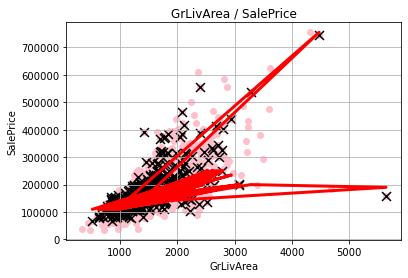

In [12]:
#SVC
from sklearn.svm import SVC
svc = SVC().fit(X_train, y_train)
y_predict_svc = svc.predict(X_test)
y_predict_svc

plt.scatter(X["GrLivArea"], y, color="pink")
plt.scatter(X_test[:,[0]],y_test , marker="x", color="black", s=80)
plt.plot(X_test[:,[0]], y_predict_svc, color="r", linewidth=3 )
plt.title("GrLivArea / SalePrice")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.grid()

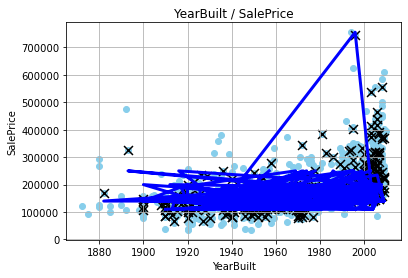

In [13]:
plt.scatter(X["YearBuilt"], y, color="skyblue")
plt.scatter(X_test[:,[1]], y_test, marker="x", color="black", s=80)
plt.plot(X_test[:,[1]], y_predict_svc, color="b", linewidth=3 )
plt.title("YearBuilt / SalePrice")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.grid()

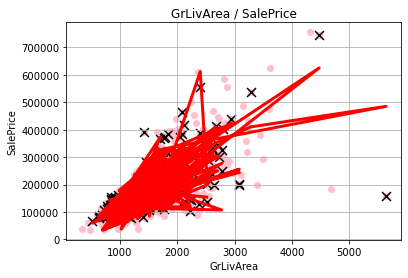

In [14]:
#決定木
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier().fit(X_train, y_train)
y_predict_DTC = DTC.predict(X_test)
y_predict_DTC

plt.scatter(X["GrLivArea"], y, color="pink")
plt.scatter(X_test[:,[0]],y_test , marker="x", color="black", s=80)
plt.plot(X_test[:,[0]], y_predict_DTC, color="r", linewidth=3 )
plt.title("GrLivArea / SalePrice")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.grid()

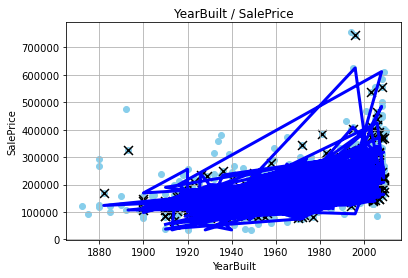

In [15]:
plt.scatter(X["YearBuilt"], y, color="skyblue")
plt.scatter(X_test[:,[1]], y_test, marker="x", color="black", s=80)
plt.plot(X_test[:,[1]], y_predict_DTC, color="b", linewidth=3 )
plt.title("YearBuilt / SalePrice")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.grid()

<ipython-input-16-0ea9e69d2eb6>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFC = RandomForestClassifier().fit(X_train, y_train)


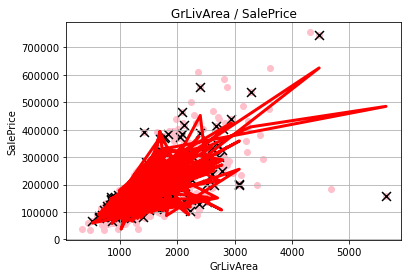

In [16]:
#ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier().fit(X_train, y_train)
y_predict_RFC = RFC.predict(X_test)
y_predict_RFC

plt.scatter(X["GrLivArea"], y, color="pink")
plt.scatter(X_test[:,[0]],y_test , marker="x", color="black", s=80)
plt.plot(X_test[:,[0]], y_predict_RFC, color="r", linewidth=3 )
plt.title("GrLivArea / SalePrice")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.grid()

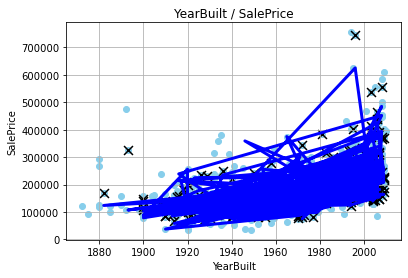

In [17]:
plt.scatter(X["YearBuilt"], y, color="skyblue")
plt.scatter(X_test[:,[1]], y_test, marker="x", color="black", s=80)
plt.plot(X_test[:,[1]], y_predict_RFC, color="b", linewidth=3 )
plt.title("YearBuilt / SalePrice")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.grid()

In [ ]:
#考察
決定木、ランダムフォレストが線形回帰、SVMに圧勝した。

## 【問題4】（アドバンス課題）他の特徴量も使用しての学習
ここまでは練習のために2つの特徴量だけを使いましたが、他の特徴量を加えるとどのようになるか検証してください。どう選択・加工するかにはデータ分析が重要になってきます。


KaggleのNotebooksも参考にできます。


House Prices: Advanced Regression Techniques | Kaggle